In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

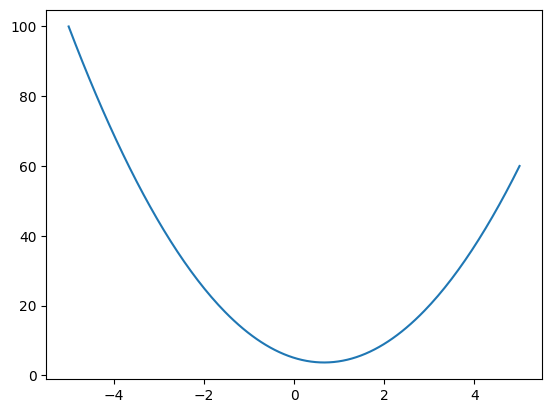

In [12]:
def f(x):
    return 3*x**2 - 4*x + 5

x = np.linspace(-5, 5, 200)
y = f(x)

plt.plot(x, y)
plt.show()

In [13]:
h = 0.00001
x = 3

def fprime(x):
    return (f(x+h) - f(x)) / h

print(fprime(x))


14.00003000000538


In [ ]:
h = 0.00001

a = 2
b = -3
c = 10

d1 = a * b + c
a += h
d2 = a * b + c

print("d1",d1)
print("d2",d2)
print("(d2 - d1)/h",(d2 - d1)/h)



d1 4
d2 3.9999699999999994
(d2 - d1)/h -3.000000000064062


In [30]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    

In [60]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'


In [53]:
from graphviz import Digraph

def trace(root):
	# builds a set of all nodes and edges in a graph
	nodes, edges = set(), set()
	def build(v):
		if v not in nodes:
			nodes.add(v)
		for child in v._prev:
			edges.add((child, v))
			build(child)
	build(root)
	return nodes, edges

def draw_dot(root):
	dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
	
	nodes, edges = trace(root)
	for n in nodes:
		uid = str(id(n))
		# for any value in the graph, create a rectangular ('record') node for it
		dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
		if n._op:
			# if this value is a result of some operation, create an op node for it
			dot.node(name = uid + n._op, label = n._op)
			# and connect this node to it
			dot.edge(uid + n._op, uid)

	for n1, n2 in edges:
		# connect n1 to the op node of n2
		dot.edge(str(id(n1)), str(id(n2)) + n2._op)

	return dot

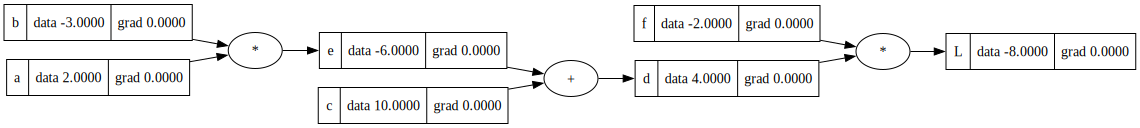

In [61]:
draw_dot(L)